# 基于python-opencv的乒乓球位置检测

In [ ]:
#导入需要的包
import cv2
import numpy as np

In [ ]:
#预处理程序，将图片转换为HSV格式，并提取图片中选定颜色范围的像素
def preprocess(image,lower_yellow,upper_yellow):
    hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_yellow ,upper_yellow)
    return mask

In [ ]:
#什么也不做，用于下一条程序中占位
def nothing(x):
    pass

In [ ]:
#创建乒乓球取色范围工具
def creat_Trackbar():
    cv2.createTrackbar('SeXiang_L', 'Trackbar', 0, 179, nothing)#色相低值
    cv2.createTrackbar('SeXiang_H', 'Trackbar', 0, 179, nothing)#色相高值
    cv2.createTrackbar('BaoHeDu_L', 'Trackbar', 0, 255, nothing)#饱和度低值
    cv2.createTrackbar('BaoHeDu_H', 'Trackbar', 0, 255, nothing)#饱和度高值
    cv2.createTrackbar('Zhi_L', 'Trackbar', 0, 255, nothing)#值-低
    cv2.createTrackbar('Zhi_H', 'Trackbar', 0, 255, nothing)#值-高
    #具体说明请参考HSV图像参数说明

In [ ]:
#读取取色器的取色范围
def read_Trackbar():
    SeXiang_L = cv2.getTrackbarPos('SeXiang_L', 'Trackbar')#色相低值
    SeXiang_H = cv2.getTrackbarPos('SeXiang_H', 'Trackbar')#色相高值
    BaoHeDu_L = cv2.getTrackbarPos('BaoHeDu_L', 'Trackbar')#饱和度低值
    BaoHeDu_H = cv2.getTrackbarPos('BaoHeDu_H', 'Trackbar')#饱和度高值
    Zhi_L = cv2.getTrackbarPos('Zhi_L', 'Trackbar')#值-低
    Zhi_H = cv2.getTrackbarPos('Zhi_H', 'Trackbar')#值-高

    lower_yellow = np.array([SeXiang_L, BaoHeDu_L, Zhi_L])
    upper_yellow = np.array([SeXiang_H, BaoHeDu_H, Zhi_H])#整理合并

    return lower_yellow,upper_yellow

In [ ]:
def show_image():
    cap = cv2.VideoCapture(0)#调用摄像头
    cv2.namedWindow('Trackbar', 2)#命名取色器窗口
    creat_Trackbar()#创建取色器窗口 

    while (1):
        _,image = cap.read()#读取每一帧图片
        cv2.imshow('Trackbar', image)#显示取色器窗口和原始图像
        image = cv2.GaussianBlur(image, (5, 5), 0)#高斯滤波，因为后面霍夫圆检测对噪声敏感
        # kernel = np.ones((5, 5), np.float32) / 25
        # image = cv2.filter2D(image, -1, kernel)#其他去噪方法

        k = cv2.waitKey(1) & 0xFF
        if k == 27:
            break#按Esc键退出程序
            
        lower_yellow,upper_yellow = read_Trackbar()#获取取色范围信息

        mask = preprocess(image,lower_yellow,upper_yellow)#提取取色范围内的像素，范围内的像素点置为1
        
        res = cv2.bitwise_and(image,image, mask= mask)#将原图像与mask进行按位与运算，只保留取色范围内的图像
        res = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)#灰度处理
        #res = cv2.Canny(res, 50, 200)#边缘检测处理（似乎用处不大）
        circles = cv2.HoughCircles(res, cv2.HOUGH_GRADIENT, 1, 10000, param1=100, param2=11, minRadius=10, maxRadius=100)
        #检测圆，具体参数说明参考霍夫圆检测参数说明，因为只检测一个球，第四个参数设得很大
        
        if circles is not None:#显示圆
            circles = np.uint16(np.around(circles))
            for i in circles[0, :]:
                cv2.circle(image, (i[0], i[1]), i[2], (255, 255, 255), 2)
                cv2.circle(image, (i[0], i[1]), 2, (255, 255, 255), 2)  # 圆心
                r = int(i[2])
                x = int(i[0])
                y = int(i[1])
                print("圆心坐标为：", (x, y))
                print("圆的半径是：", r)
        else :
            print('乒乓球不存在')
        cv2.imshow('res', res)
        cv2.imshow('image', image)

    cv2.destroyAllWindows()

In [ ]:
if __name__ == '__main__':#启动程序
    show_image()

# 总程序

In [ ]:
import cv2
import numpy as np

def preprocess(image,lower_yellow,upper_yellow):
    hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_yellow ,upper_yellow)
    return mask

def nothing(x):
    pass

def creat_Trackbar():
    cv2.createTrackbar('SeXiang_L', 'Trackbar', 0, 179, nothing)
    cv2.createTrackbar('SeXiang_H', 'Trackbar', 0, 179, nothing)
    cv2.createTrackbar('BaoHeDu_L', 'Trackbar', 0, 255, nothing)
    cv2.createTrackbar('BaoHeDu_H', 'Trackbar', 0, 255, nothing)
    cv2.createTrackbar('Zhi_L', 'Trackbar', 0, 255, nothing)
    cv2.createTrackbar('Zhi_H', 'Trackbar', 0, 255, nothing)

def read_Trackbar():
    SeXiang_L = cv2.getTrackbarPos('SeXiang_L', 'Trackbar')
    SeXiang_H = cv2.getTrackbarPos('SeXiang_H', 'Trackbar')
    BaoHeDu_L = cv2.getTrackbarPos('BaoHeDu_L', 'Trackbar')
    BaoHeDu_H = cv2.getTrackbarPos('BaoHeDu_H', 'Trackbar')
    Zhi_L = cv2.getTrackbarPos('Zhi_L', 'Trackbar')
    Zhi_H = cv2.getTrackbarPos('Zhi_H', 'Trackbar')

    lower_yellow = np.array([SeXiang_L, BaoHeDu_L, Zhi_L])
    upper_yellow = np.array([SeXiang_H, BaoHeDu_H, Zhi_H])

    return lower_yellow,upper_yellow


def show_image():
    cap = cv2.VideoCapture(0)
    #cv2.namedWindow('mask', 2)
    cv2.namedWindow('Trackbar', 2)
    creat_Trackbar()

    while (1):
        _,image = cap.read()
        cv2.imshow('Trackbar', image)
        image = cv2.GaussianBlur(image, (5, 5), 0)
        # kernel = np.ones((5, 5), np.float32) / 25
        # image = cv2.filter2D(image, -1, kernel)

        k = cv2.waitKey(1) & 0xFF
        if k == 27:
            break
        lower_yellow,upper_yellow = read_Trackbar()

        mask = preprocess(image,lower_yellow,upper_yellow)
        res = cv2.bitwise_and(image,image, mask= mask)
        res = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
        #res = cv2.Canny(res, 50, 200)
        circles = cv2.HoughCircles(res, cv2.HOUGH_GRADIENT, 1, 1000000, param1=100, param2=11, minRadius=10, maxRadius=100)
        #print(circles)
        if circles is not None:
            circles = np.uint16(np.around(circles))
            for i in circles[0, :]:
                cv2.circle(image, (i[0], i[1]), i[2], (255, 255, 255), 2)
                cv2.circle(image, (i[0], i[1]), 2, (255, 255, 255), 2)  # 圆心
                r = int(i[2])
                x = int(i[0])
                y = int(i[1])
                print("圆心坐标为：", (x, y))
                print("圆的半径是：", r)
        else :
            #print('乒乓球不存在')
            pass
        cv2.imshow('res', res)
        cv2.imshow('image', image)

    cv2.destroyAllWindows()

if __name__ == '__main__':
    show_image()

使用说明：
1.根据环境背景调整取色器值，并使得‘res’窗口中仅显示乒乓球
(下面是我对黄色乒乓球取色的参考值)不同背景环境下取值存在差别

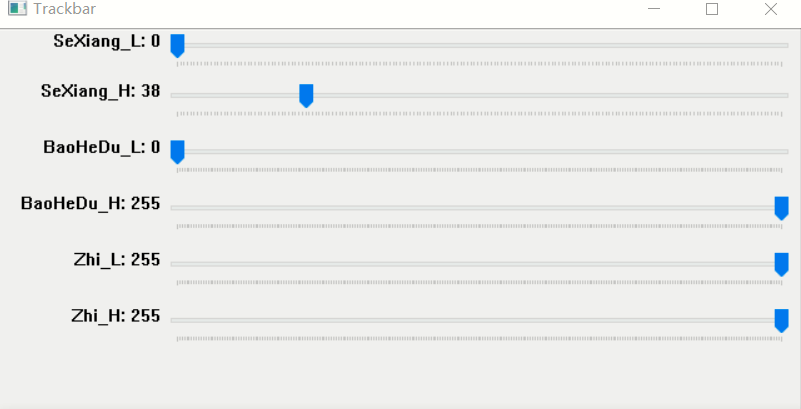

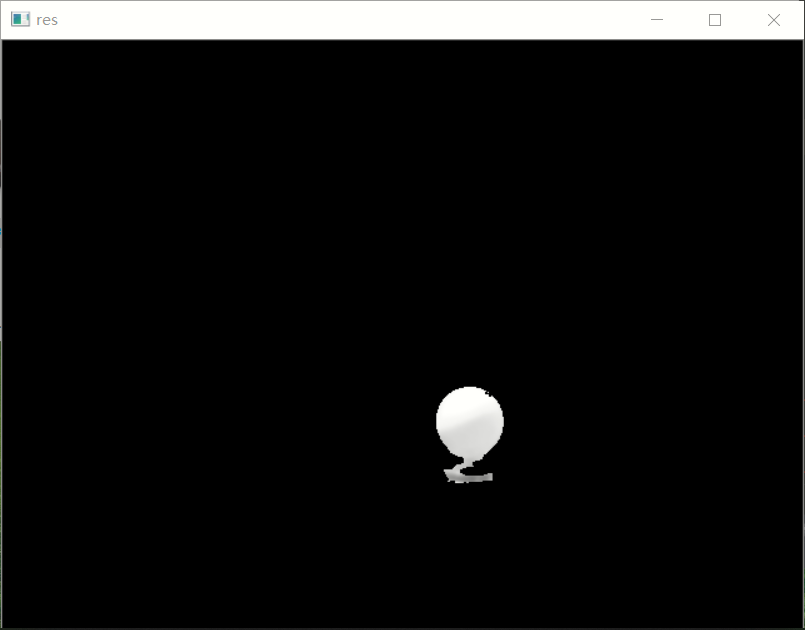

2.然后‘image’窗口中将会识别出乒乓球的位置并标记出来，在终端输出乒乓球的圆心坐标和半径

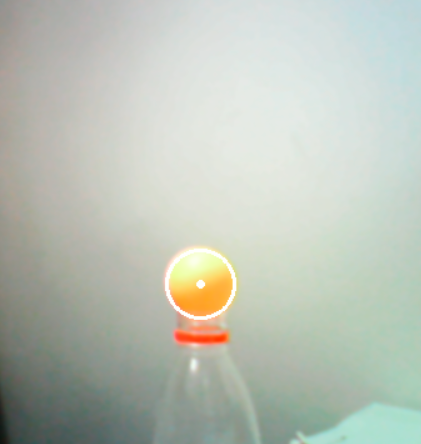

总结：检测的大致思路是从摄像头读取每一帧的图像信息并滤波image、将image图片转换为hsv格式并利用取色器提取包含乒乓球的像素点mask,将mask和image进行按位与运算提取出图像中的乒乓球res，将res进行灰度处理然后用霍夫圆检测res中的圆并标注在原始image图像中

利用霍夫圆检测来识别图像中的圆来达到检测乒乓球的目的，但霍夫圆检测本身对图像质量要求比较高，所以前期需要对图像进行合理的处理（此处仅进行了简单的滤波处理），用在视频实时监测的情况下效果感觉还不是很好，利用取色器可以帮助程序在较复杂的环境中对乒乓球的颜色检测范围做较好的调试，本程序只是学习过程中的一个综合运用，在实际使用中的效果还有待检测